# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import random
import json
import time
from pprint import pprint
from scipy.stats import linregress

#installed pip install citipy on terminal
from citipy import citipy

output_data_file = pd.read_csv(os.path.join("..", "output_data", "cities.csv"))

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

## Generate Cities List

643

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []

cities = []

# Create a set of random lat and lng combinations for a random 500 cities (no repeats)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

citiesfinal = cities[:500] #grab the first 500 unique cities in the list
len(citiesfinal)

500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "Houston"
#units = "imperial"
# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units

#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

#second URL complete
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_name = []
clouds = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# Create record counter initialized at 1.
record = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('-'*25)

# Loop through all cities in cities list.
for city in cities:
    
    # Try statement to append calls where values are found.
    try:
        print(f'Processing Record {record} | {city}')
        
        response = requests.get(f'{base_url}&q={city}').json()
        city_name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
         
        # Increase record counter.
        record += 1
        
        # Do not exceed API call limit.
        time.sleep(1.01)
        
    # If no record found for city, then skip. #add error types
    except:
        print('City not found. Skip...')
    #continue
   #break


Beginning Data Retrieval
-------------------------
Processing Record 1 | babu
Processing Record 2 | punta arenas
Processing Record 3 | albany
Processing Record 4 | tsihombe
City not found. Skip...
Processing Record 4 | ancud
Processing Record 5 | rikitea
Processing Record 6 | pevek
Processing Record 7 | port macquarie
Processing Record 8 | emba
Processing Record 9 | rio grande
Processing Record 10 | taolanaro
City not found. Skip...
Processing Record 10 | eyl
Processing Record 11 | vaini
Processing Record 12 | tianpeng
Processing Record 13 | caravelas
Processing Record 14 | wanaka
Processing Record 15 | hasaki
Processing Record 16 | ushuaia
Processing Record 17 | cape town
Processing Record 18 | mataura
Processing Record 19 | butaritari
Processing Record 20 | lima
Processing Record 21 | avarua
Processing Record 22 | yellowknife
Processing Record 23 | boundiali
Processing Record 24 | nalut
Processing Record 25 | sofiysk
City not found. Skip...
Processing Record 25 | ponta do sol
Process

Processing Record 216 | umzimvubu
City not found. Skip...
Processing Record 216 | porosozero
Processing Record 217 | muzhi
Processing Record 218 | shirokovskiy
Processing Record 219 | saint-philippe
Processing Record 220 | airai
Processing Record 221 | vicosa
Processing Record 222 | zhelyabovka
Processing Record 223 | shelburne
Processing Record 224 | umm lajj
Processing Record 225 | berlevag
Processing Record 226 | brae
Processing Record 227 | kieta
Processing Record 228 | bo
City not found. Skip...
Processing Record 228 | georgiyevka
Processing Record 229 | porto real
Processing Record 230 | hobyo
Processing Record 231 | toliary
City not found. Skip...
Processing Record 231 | botelhos
Processing Record 232 | hambantota
Processing Record 233 | mountain home
Processing Record 234 | dori
Processing Record 235 | solhan
Processing Record 236 | rio real
Processing Record 237 | marawi
Processing Record 238 | stephenville
Processing Record 239 | samalaeulu
City not found. Skip...
Processing 

Processing Record 431 | komsomolskiy
Processing Record 432 | haibowan
City not found. Skip...
Processing Record 432 | eunice
Processing Record 433 | manggar
Processing Record 434 | valparaiso
Processing Record 435 | kuytun
Processing Record 436 | tubruq
City not found. Skip...
Processing Record 436 | katherine
Processing Record 437 | mariental
Processing Record 438 | canandaigua
Processing Record 439 | ust-ilimsk
Processing Record 440 | laguna
Processing Record 441 | pirovskoye
Processing Record 442 | omboue
Processing Record 443 | turan
Processing Record 444 | caluquembe
Processing Record 445 | whitehorse
Processing Record 446 | los llanos de aridane
Processing Record 447 | okhotsk
Processing Record 448 | kenora
Processing Record 449 | kurtalan
Processing Record 450 | ushibuka
Processing Record 451 | port keats
Processing Record 452 | tiznit
Processing Record 453 | kavieng
Processing Record 454 | moba
Processing Record 455 | xalpatlahuac
Processing Record 456 | krupanj
Processing Reco

In [25]:
city_name
clouds
country
date 
humidity
lats
lngs
max_temps
wind_speeds

[28.49]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [7]:
# Create values dictionary from API call lists.
weatherdata = {
    'City':city_name,
    'Lat': lats,
    'Lng': lngs,
    'Max Temp': max_temps,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind_speeds,
    'Country': country,
    'Date': date,
    }

# Create new DF for values in dictionary.
df_weather = pd.DataFrame(weatherdata)

# Display count of weather values per column.
df_weather.count()

# Save csv file.
df_weather.to_csv('weather_data.csv')

df_weather.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Babu,24.42,111.52,77.81,87,98,1.32,CN,1600127814
1,Punta Arenas,-53.15,-70.92,37.40,86,75,25.28,CL,1600127815
2,Albany,42.60,-73.97,59.00,43,0,3.00,US,1600127817
3,Ancud,-41.87,-73.82,50.00,89,100,6.60,CL,1600127818
4,Rikitea,-23.12,-134.97,74.19,82,13,12.77,PF,1600127819
5,Pevek,69.70,170.31,42.12,79,100,6.82,RU,1600127821
6,Port Macquarie,-31.43,152.92,73.99,71,4,5.73,AU,1600127822
7,Emba,48.83,58.14,57.87,58,100,18.14,KZ,1600127823
8,Rio Grande,-32.03,-52.10,51.01,75,64,3.00,BR,1600127677
9,Eyl,7.98,49.82,78.76,74,14,13.22,SO,1600127826


In [8]:
#summary of information with numerical values
df_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.208199,16.752537,65.958272,71.566176,49.053309,7.675257,1.600128e+09
std,33.190020,89.213739,14.677594,20.513285,37.971916,5.041010,2.172065e+02
min,-54.800000,-179.170000,21.830000,3.000000,0.000000,0.020000,1.600128e+09
25%,-7.120000,-59.850000,53.600000,61.000000,8.000000,3.775000,1.600128e+09
50%,21.375000,18.245000,68.000000,76.000000,46.000000,6.875000,1.600128e+09
75%,48.002500,98.747500,78.240000,87.000000,90.000000,10.290000,1.600128e+09
max,78.220000,179.320000,101.790000,100.000000,100.000000,31.830000,1.600129e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [10]:
humid100 = df_weather[df_weather['Humidity']<=100]

humid100.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Babu,24.42,111.52,77.81,87,98,1.32,CN,1600127814
1,Punta Arenas,-53.15,-70.92,37.40,86,75,25.28,CL,1600127815
2,Albany,42.60,-73.97,59.00,43,0,3.00,US,1600127817
3,Ancud,-41.87,-73.82,50.00,89,100,6.60,CL,1600127818
4,Rikitea,-23.12,-134.97,74.19,82,13,12.77,PF,1600127819
5,Pevek,69.70,170.31,42.12,79,100,6.82,RU,1600127821
6,Port Macquarie,-31.43,152.92,73.99,71,4,5.73,AU,1600127822
7,Emba,48.83,58.14,57.87,58,100,18.14,KZ,1600127823
8,Rio Grande,-32.03,-52.10,51.01,75,64,3.00,BR,1600127677
9,Eyl,7.98,49.82,78.76,74,14,13.22,SO,1600127826


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [13]:
#max temp from summary did not identify cities otherwise would have index #s for the respective city
humid_index = df_weather[df_weather['Humidity']>100].index
humid_index

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" (this is default) will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [15]:
clean_city_data = df_weather.drop(humid_index)
clean_city_data                                             
                                             

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Babu,24.42,111.52,77.81,87,98,1.32,CN,1600127814
1,Punta Arenas,-53.15,-70.92,37.40,86,75,25.28,CL,1600127815
2,Albany,42.60,-73.97,59.00,43,0,3.00,US,1600127817
3,Ancud,-41.87,-73.82,50.00,89,100,6.60,CL,1600127818
4,Rikitea,-23.12,-134.97,74.19,82,13,12.77,PF,1600127819
...,...,...,...,...,...,...,...,...,...
539,Fort-Shevchenko,44.51,50.26,71.10,69,13,13.22,KZ,1600128522
540,Ascension,30.22,-90.90,79.00,88,90,4.70,US,1600128523
541,Sisimiut,66.94,-53.67,34.32,77,41,10.04,GL,1600128525
542,Thunder Bay,48.40,-89.32,53.60,62,75,5.82,CA,1600128526


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

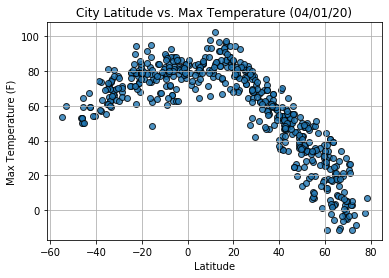

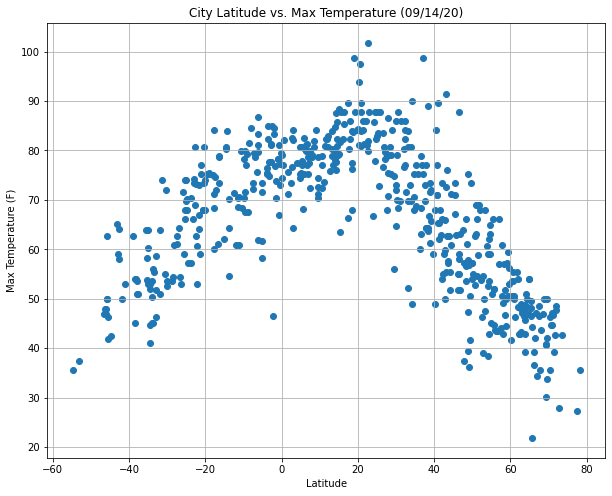

In [17]:
# Establishes size for the next visualization/graph
plt.figure(figsize=(10,8))

# Establishes type, data, and configuration for visualization/graph
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], linewidths=1, marker="o")

# Creates labels and grid for graph
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Exports graph as a png image file (steps are repeated for the rest of the script...)
plt.savefig("Fig1Lat&TempPlot.png")

## Latitude vs. Humidity Plot

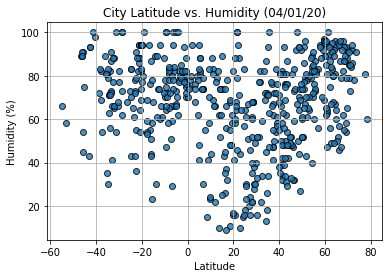

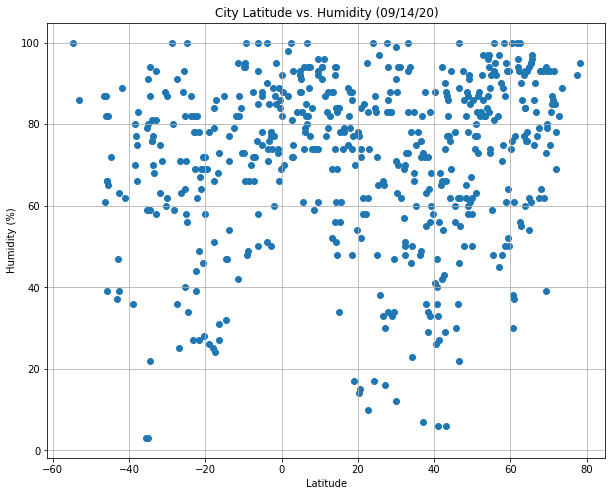

In [18]:
plt.figure(figsize=(10,8))

plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], linewidths=1, marker="o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Fig2Lat&HumidityPlot.png")

## Latitude vs. Cloudiness Plot

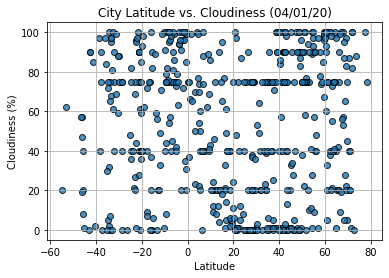

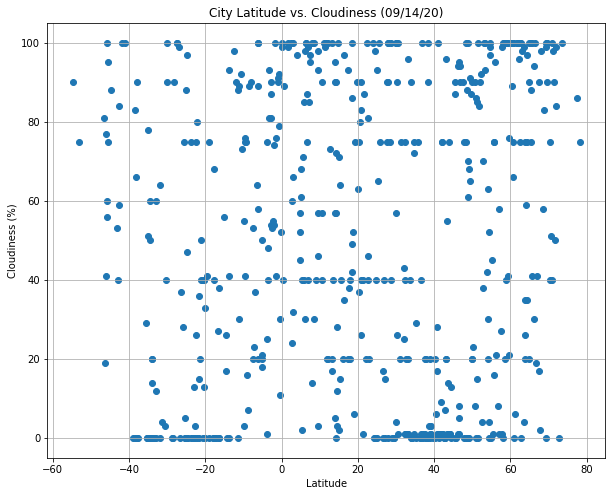

In [20]:
plt.figure(figsize=(10,8))

plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], linewidths=1, marker="o")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Fig3Lat&Cloudiness.png")

## Latitude vs. Wind Speed Plot

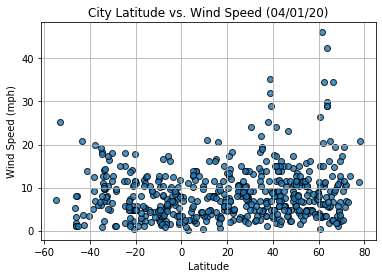

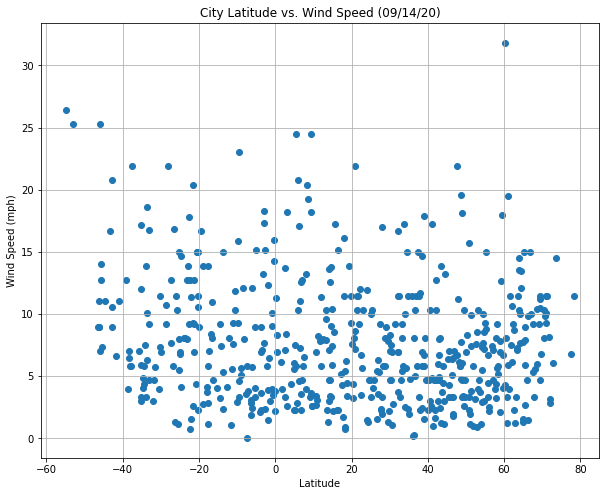

In [21]:
plt.figure(figsize=(10,8))

plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], linewidths=1, marker="o")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Fig4Lat&WindSpeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


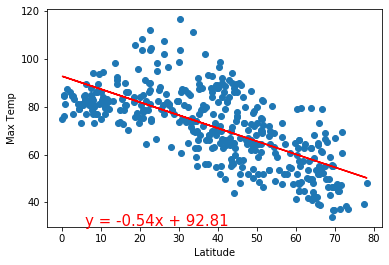

The line of best fit: y = -0.64x + 90.07
The r-value is: -0.8182108917139526


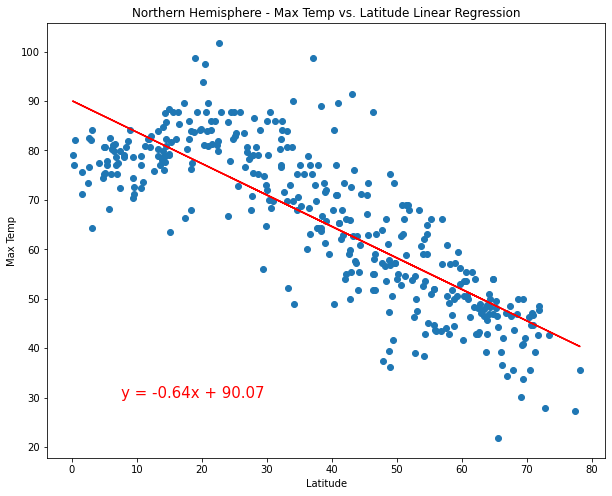

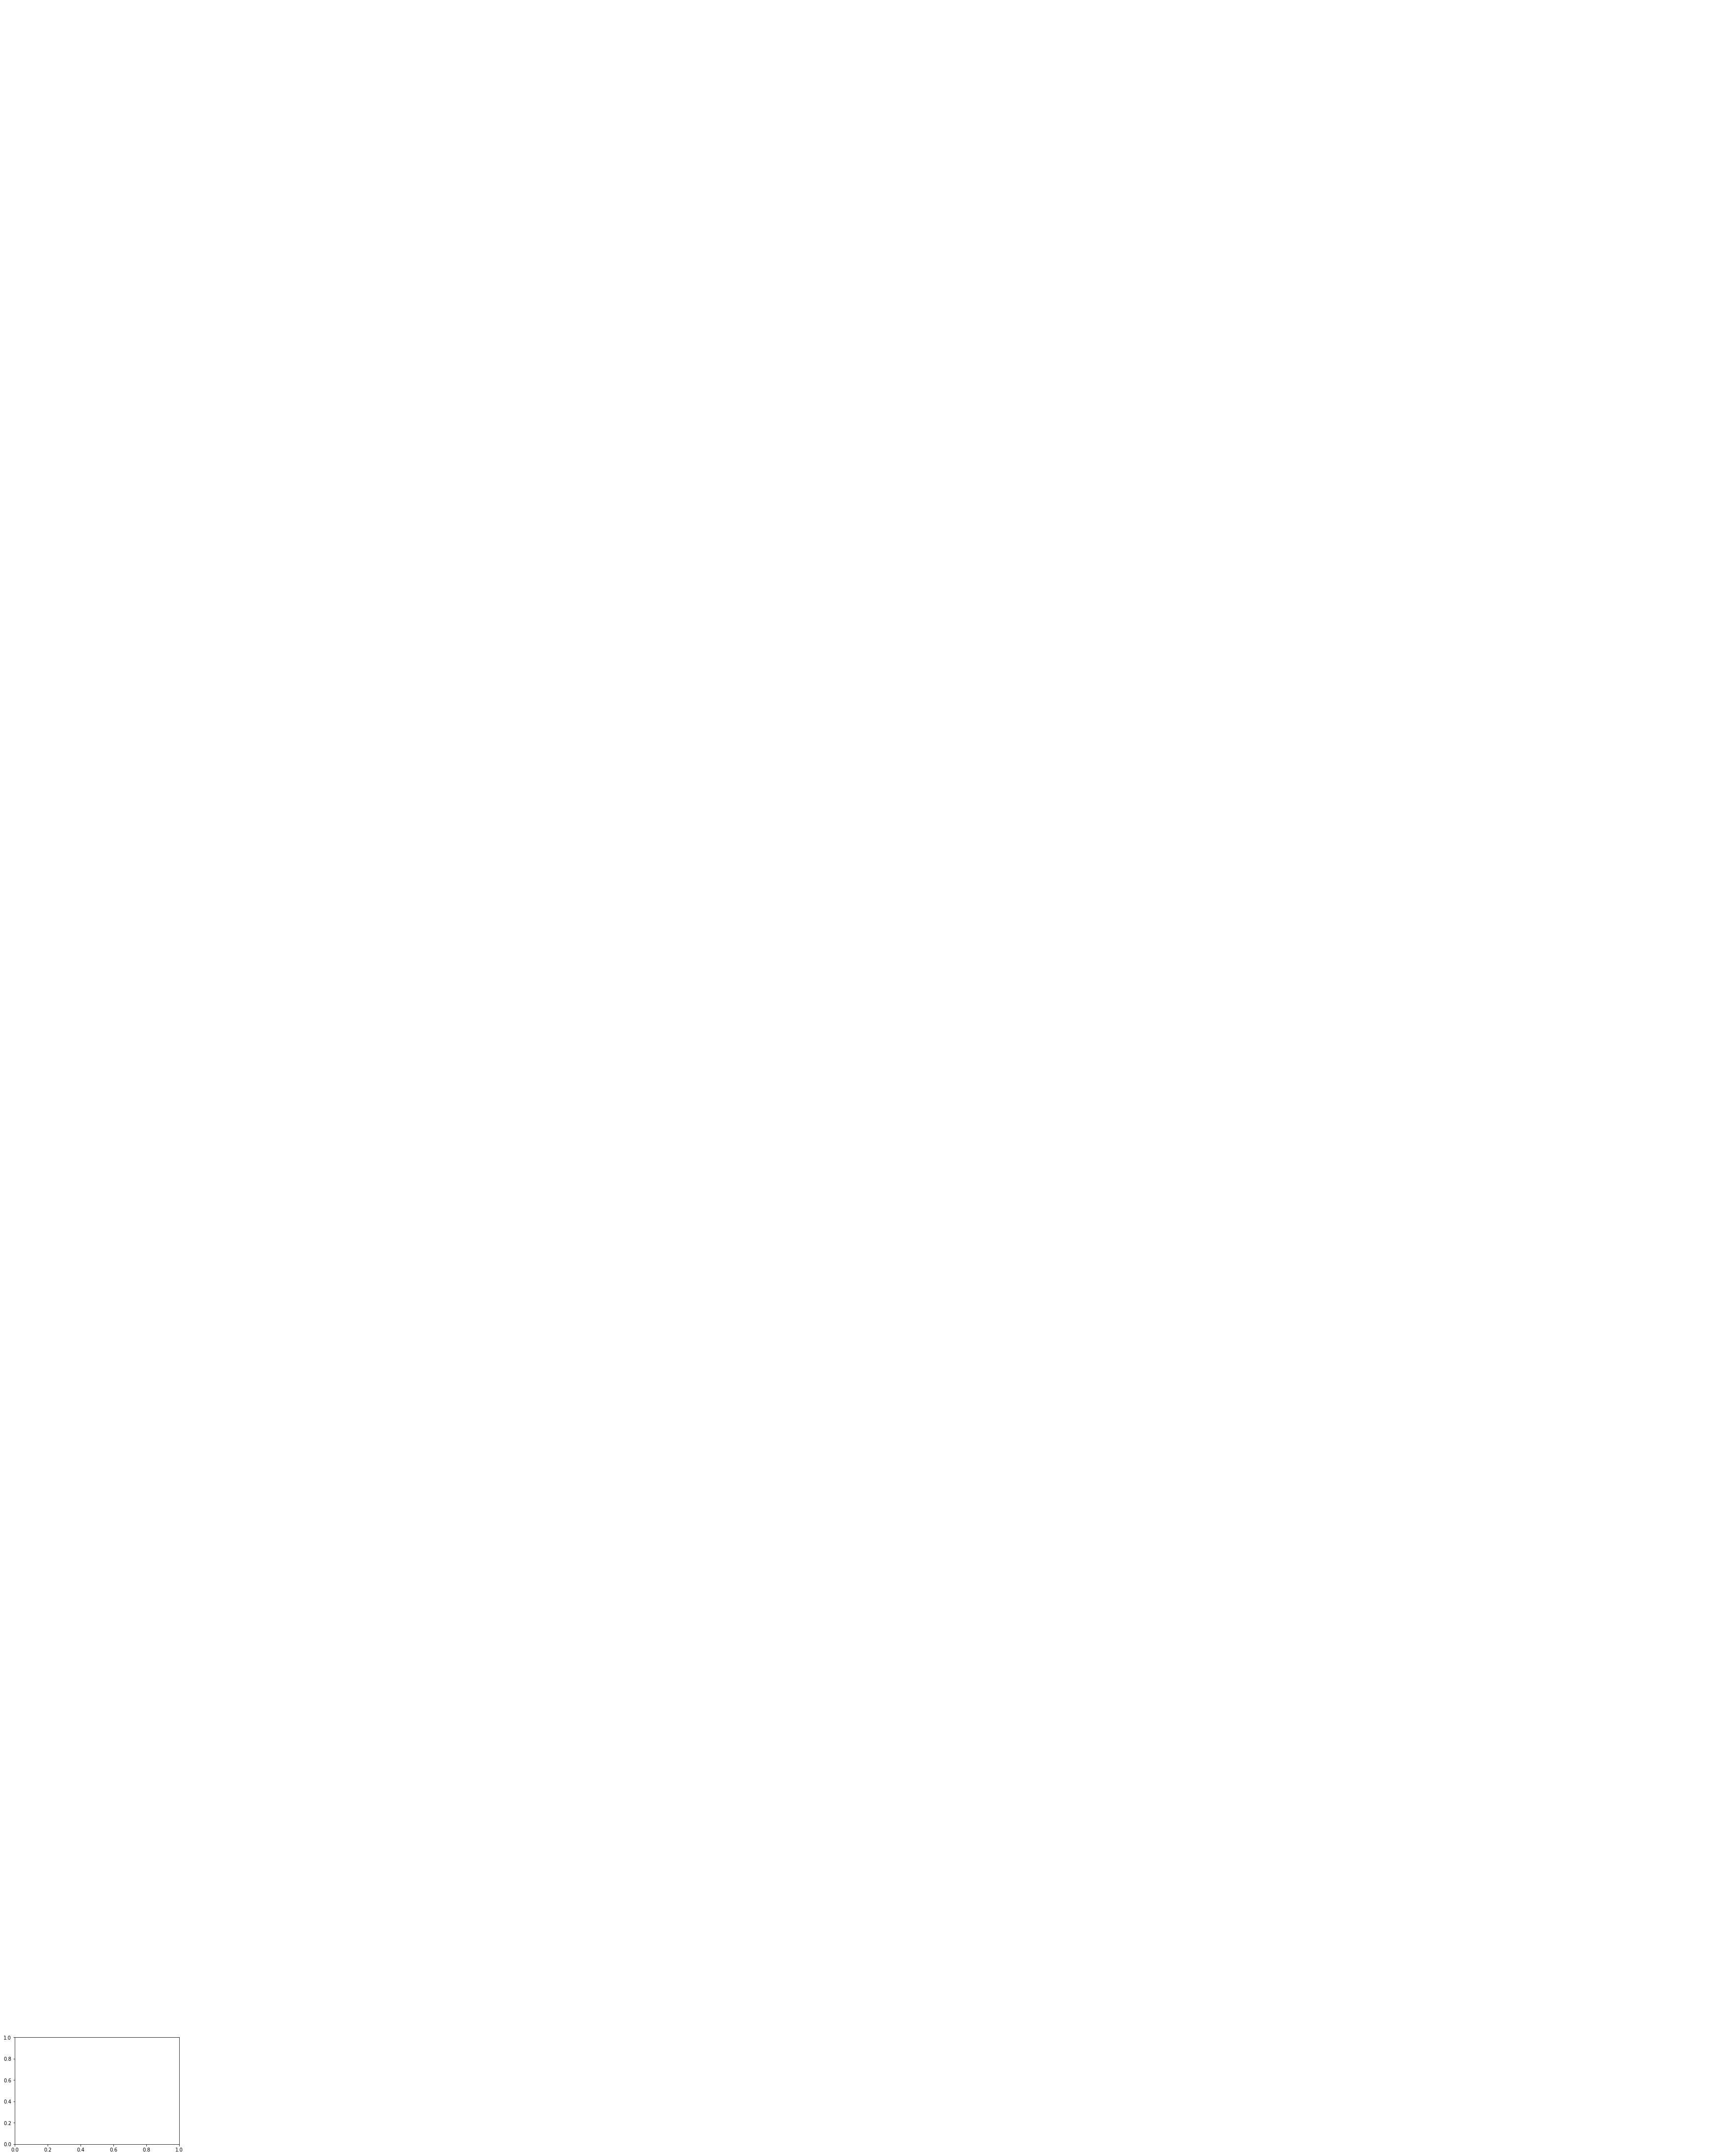

In [23]:
north_df = clean_city_data[clean_city_data['Lat']>=0]
x_valuesnorth = north_df['Lat']
y_values = north_df['Max Temp']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuesnorth, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values1 = x_valuesnorth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq1}")


plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuesnorth, y_values)

# Plot the regression line
plt.plot(x_valuesnorth, regression_values1, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq1, (7.5, 30), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")


# Add the linear equation to the plot
plt.annotate(line_eq1, (10, 20), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (10, 20), fontsize=10, color="red")


plt.savefig("Fig5NorthHemi&MaxTemp.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


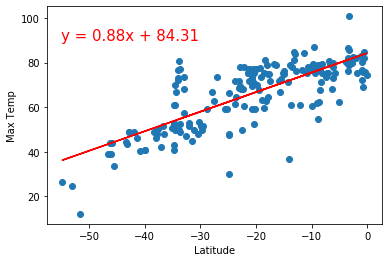

The line of best fit: y = 0.66x + 79.92
The r-value is: 0.7666765570171966


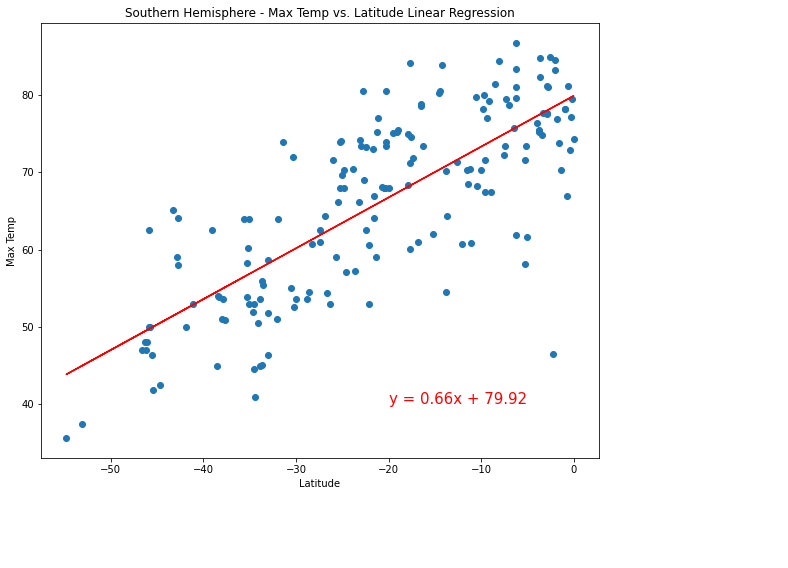

In [45]:
south_df = clean_city_data[clean_city_data['Lat']<=0]
x_valuessouth = south_df['Lat']
y_values = south_df['Max Temp']


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuessouth, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values2 = x_valuessouth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq2}")

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuessouth, y_values)

# Plot the regression line
plt.plot(x_valuessouth, regression_values2, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq2, (7.5, 30), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")


# Add the linear equation to the plot
plt.annotate(line_eq2, (-20, 40), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (10, 20), fontsize=10, color="red")

plt.savefig("Fig6SouthHemi&MaxTemp.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


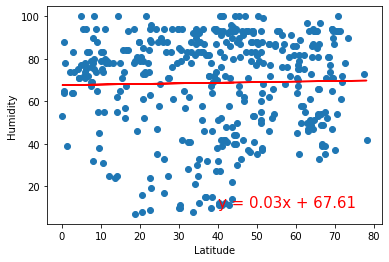

The line of best fit: y = 0.04x + 71.34
The r-value is: 0.035260198493508775


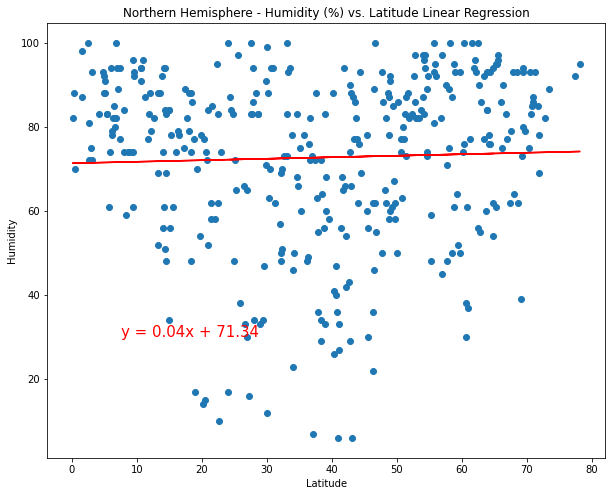

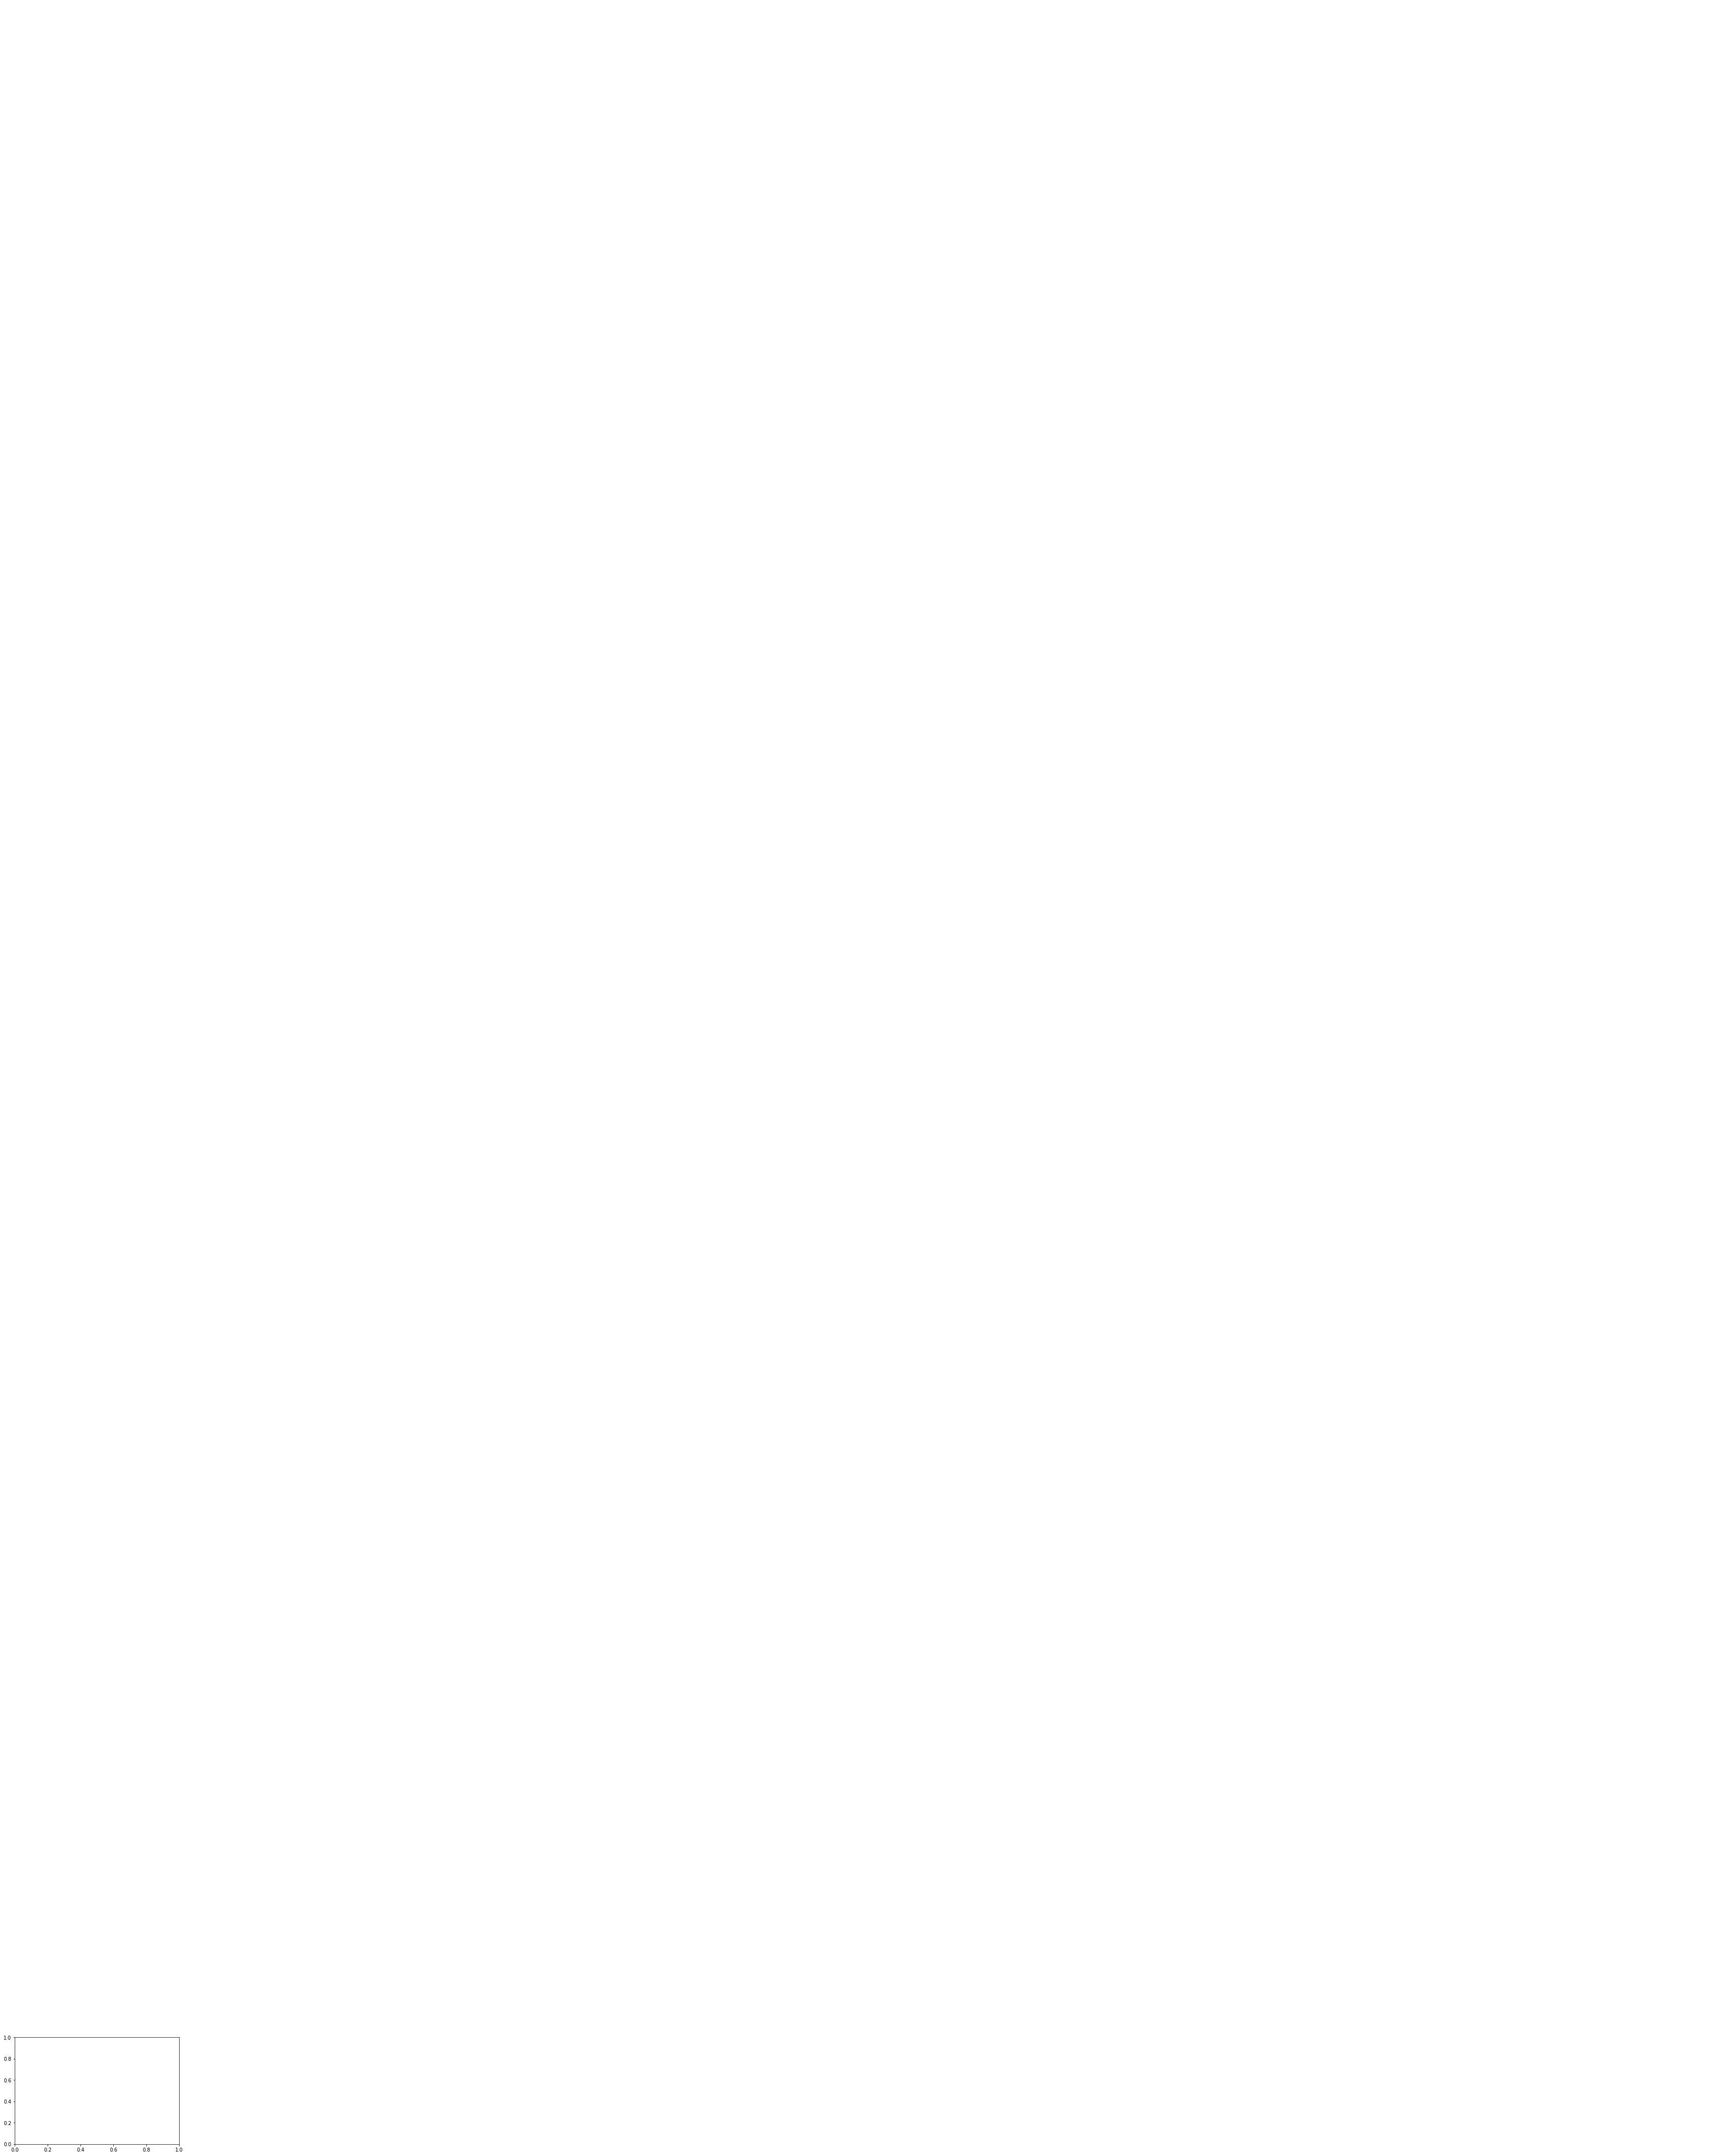

In [26]:

y_valueshumid = north_df['Humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuesnorth, y_valueshumid)

# Calculate the predictions for each value of x (# Rooms)
regression_values3 = x_valuesnorth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq3}")

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuesnorth, y_valueshumid)

# Plot the regression line
plt.plot(x_valuesnorth, regression_values3, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq3, (7.5, 30), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")


# Add the linear equation to the plot
plt.annotate(line_eq3, (10, 20), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (10, 20), fontsize=10, color="red")

plt.savefig("Fig7NorthHemi&Humidity.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


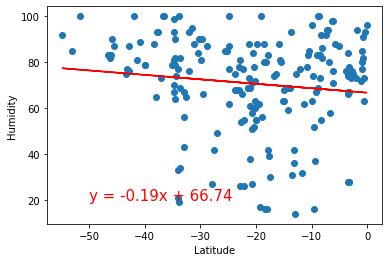

The line of best fit: y = 0.22x + 73.68
The r-value is: 0.1479443690833441


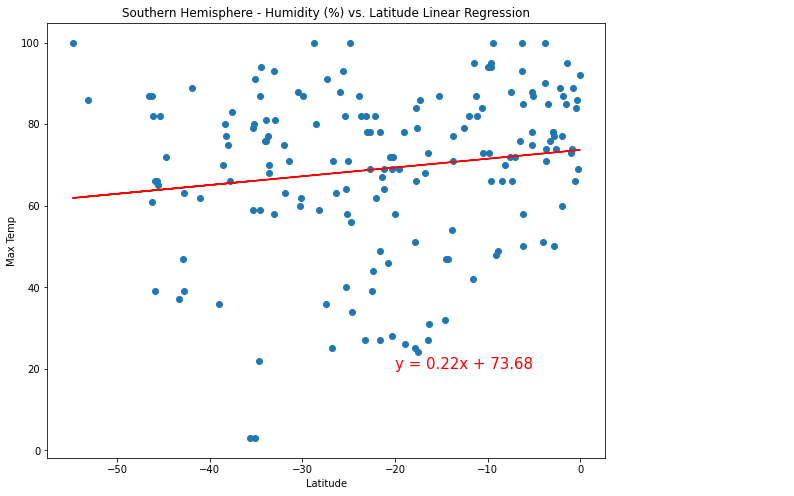

In [44]:
y_valueshumid = south_df['Humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuessouth, y_valueshumid)

# Calculate the predictions for each value of x (# Rooms)
regression_values4 = x_valuessouth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq4}")

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuessouth, y_valueshumid)

# Plot the regression line
plt.plot(x_valuessouth, regression_values4, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq4, (7.5, 30), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")


# Add the linear equation to the plot
plt.annotate(line_eq4, (-20, 20), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (10, 20), fontsize=10, color="red")

plt.savefig("Fig8SouthHemi&Humidity.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


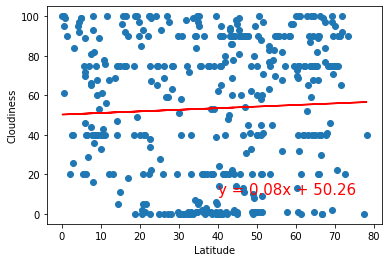

The line of best fit: y = 0.04x + 49.9
The r-value is: 0.02337513990989435


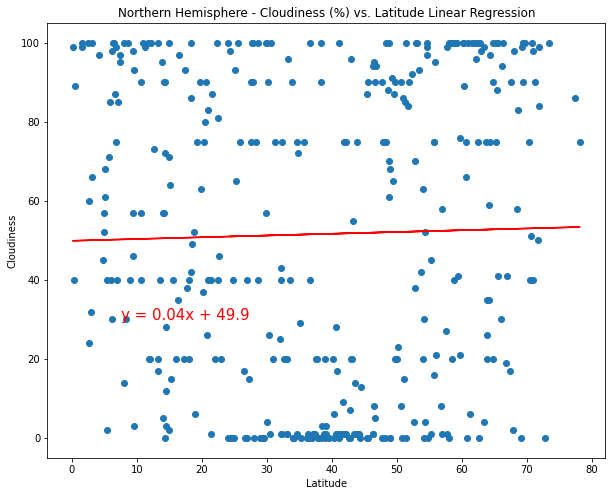

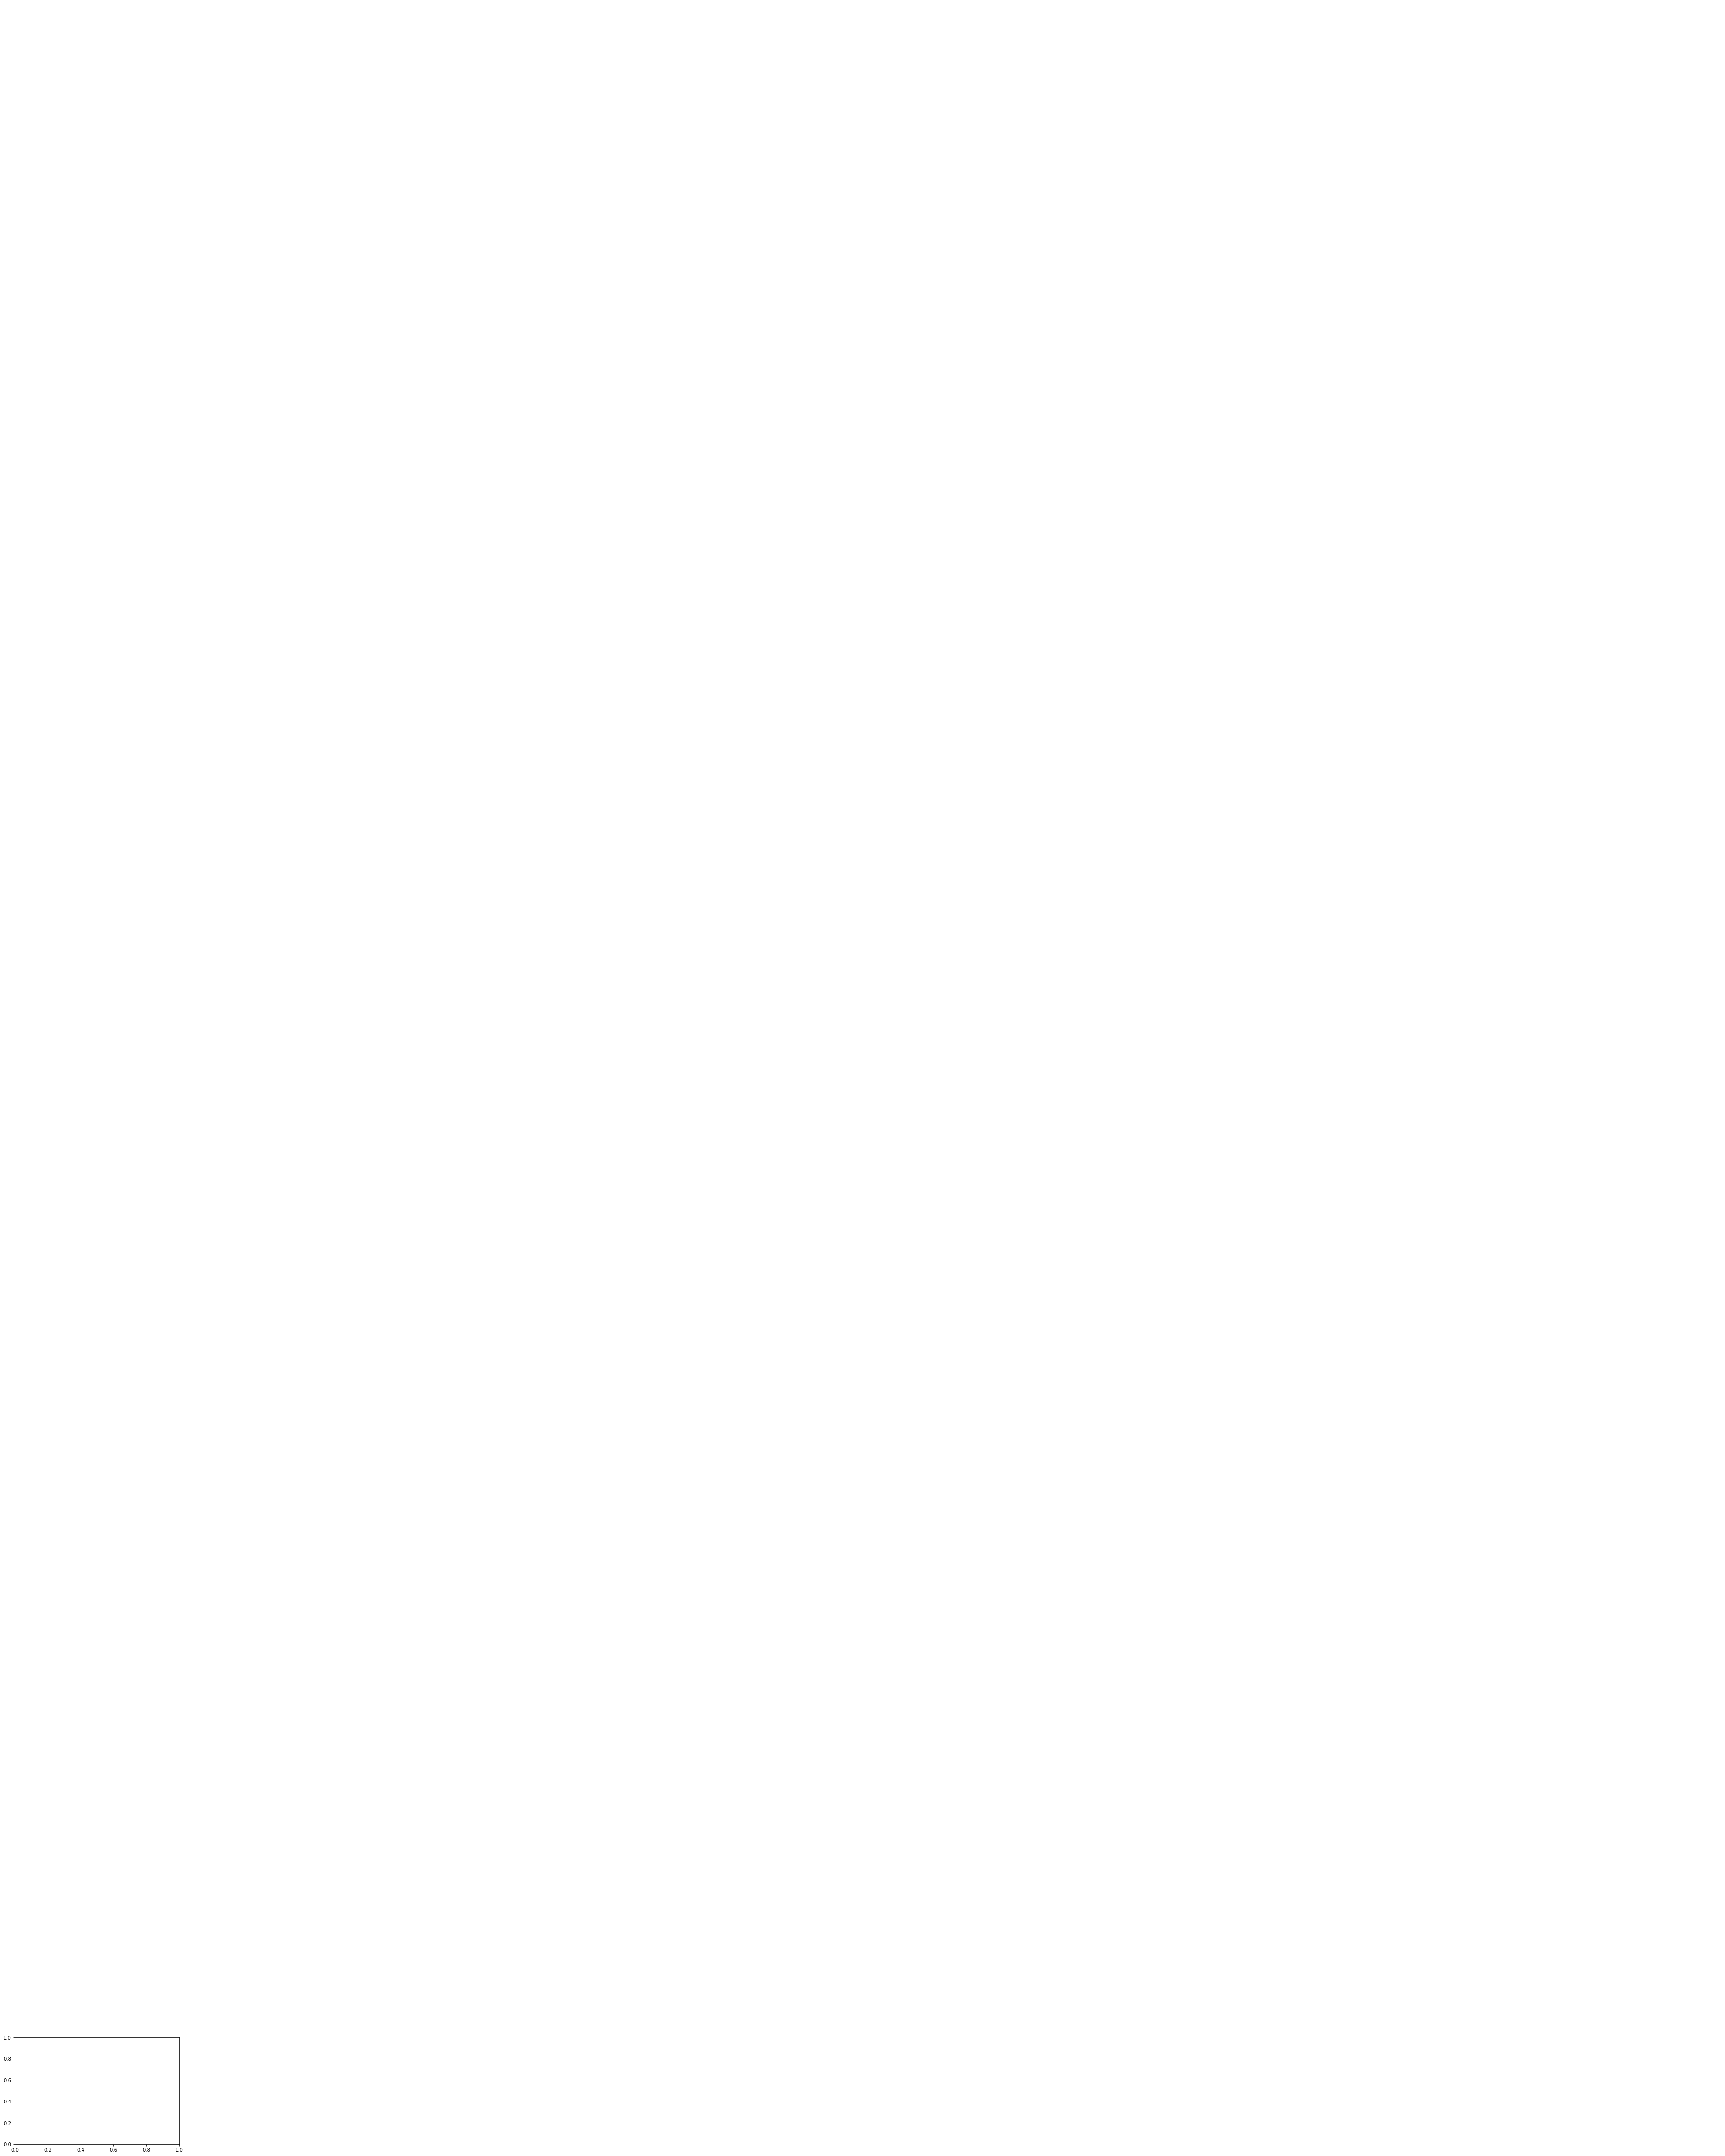

In [29]:

y_valuescloud = north_df['Cloudiness']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuesnorth, y_valuescloud)

# Calculate the predictions for each value of x (# Rooms)
regression_values5 = x_valuesnorth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq5}")

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuesnorth, y_valuescloud)

# Plot the regression line
plt.plot(x_valuesnorth, regression_values5, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq5, (7.5, 30), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")


# Add the linear equation to the plot
plt.annotate(line_eq5, (10, 20), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (10, 20), fontsize=10, color="red")

plt.savefig("Fig9NorthHemi&Cloudiness.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


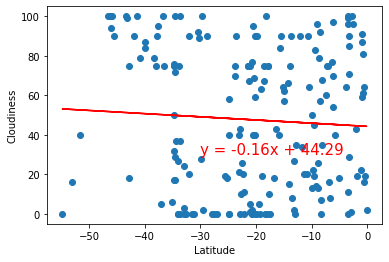

The line of best fit: y = 0.23x + 48.49
The r-value is: 0.0890616596205958


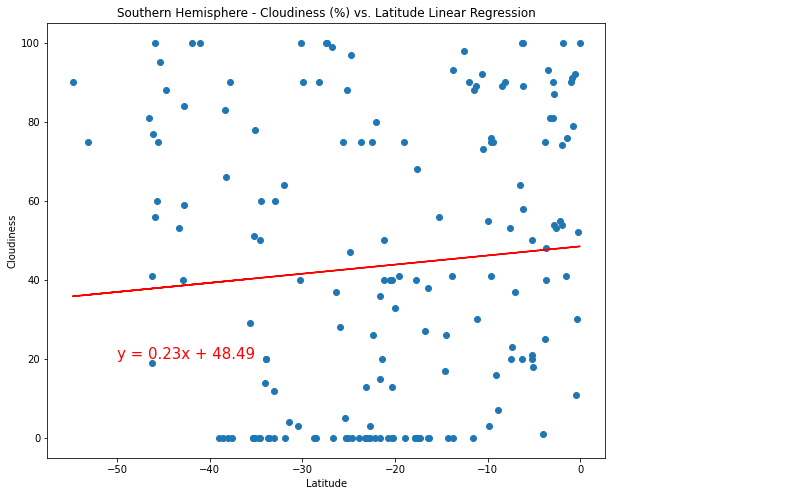

In [42]:

y_valuescloud = south_df['Cloudiness']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuessouth, y_valuescloud)

# Calculate the predictions for each value of x (# Rooms)
regression_values6 = x_valuessouth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq6}")

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuessouth, y_valuescloud)

# Plot the regression line
plt.plot(x_valuessouth, regression_values6, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq6, (7.5, 30), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")



# Add the linear equation to the plot
plt.annotate(line_eq6, (-50, 20), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (10, 20), fontsize=10, color="red")

plt.savefig("Fig10SouthHemi&Cloudiness.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


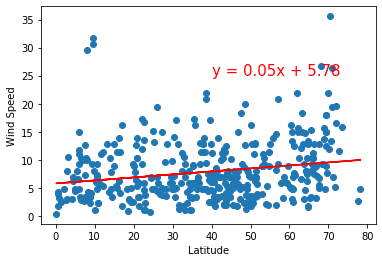

The line of best fit: y = -0.01x + 7.43
The r-value is: -0.023903692639687602


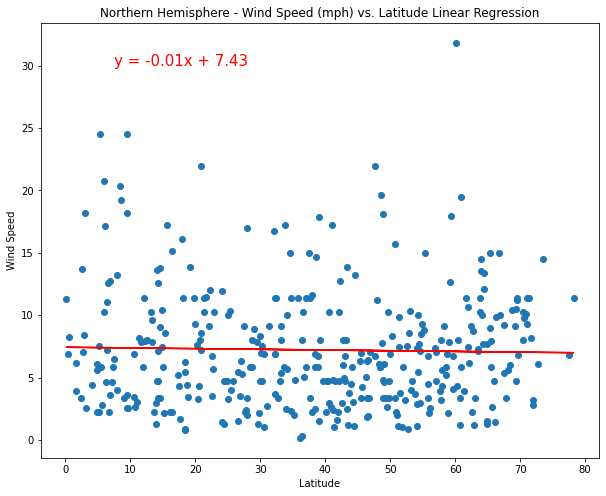

In [37]:
#first
y_valueswind = north_df['Wind Speed']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuesnorth, y_valueswind)

# Calculate the predictions for each value of x (# Rooms)
regression_values7 = x_valuesnorth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq7}")

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuesnorth, y_valueswind)

# Plot the regression line
plt.plot(x_valuesnorth, regression_values7, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq7, (7.5, 30), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")


plt.savefig("Fig11NorthHemi&WindSpeed.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


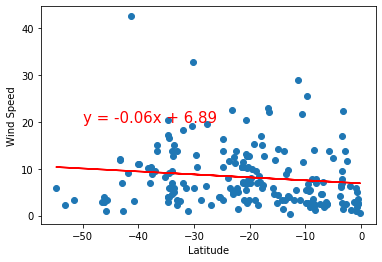

The line of best fit: y = -0.11x + 6.33
The r-value is: -0.27738607113256725


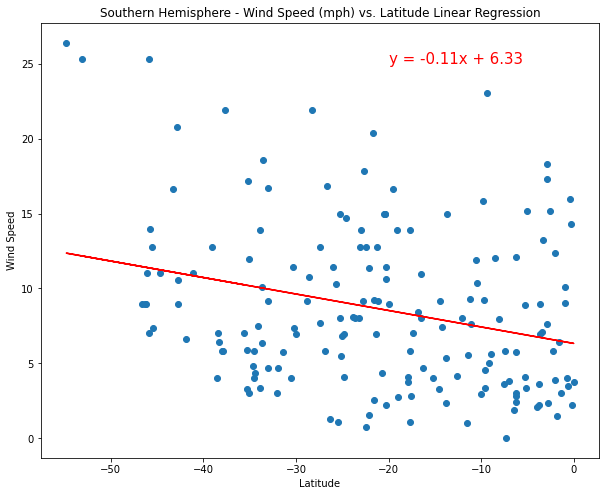

In [41]:
#2nd one
y_valueswind = south_df['Wind Speed']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_valuessouth, y_valueswind)

# Calculate the predictions for each value of x (# Rooms)
regression_values8 = x_valuessouth * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq8}")

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_valuessouth, y_valueswind)

# Plot the regression line
plt.plot(x_valuessouth, regression_values8, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq8, (-20, 25), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")


plt.savefig("Fig12SouththHemi&WindSpeed.png")

#always do .show at the end
plt.show()